In [1]:
import pandas as pd
df = pd.read_csv("/content/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#UNIVARIATE ANALYSIS


In [3]:
import seaborn as sns

<ipython-input-4-9161f519b2fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_depth_mm'])


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

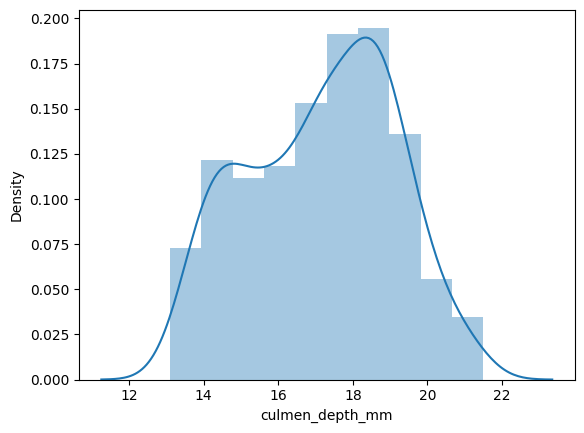

In [4]:
sns.distplot(df['culmen_depth_mm'])

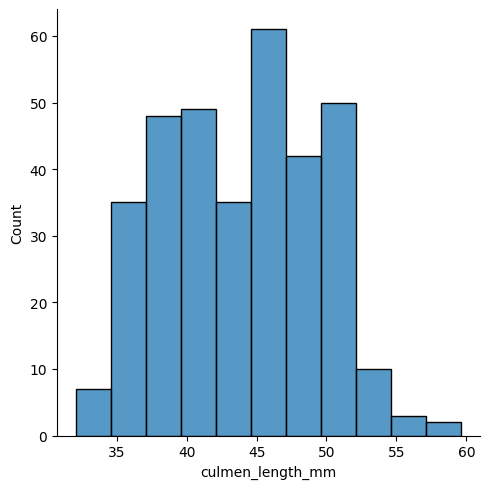

In [6]:
sns.displot(df['culmen_length_mm'])

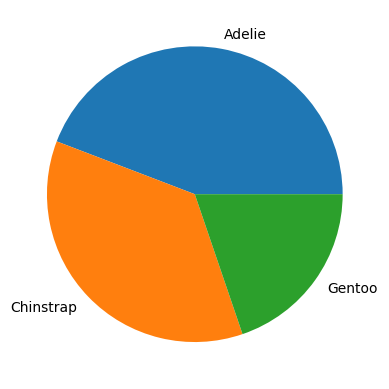

In [8]:
plt.pie(df['species'].value_counts(),labels = df['species'].unique())
plt.show()

<Axes: ylabel='island'>

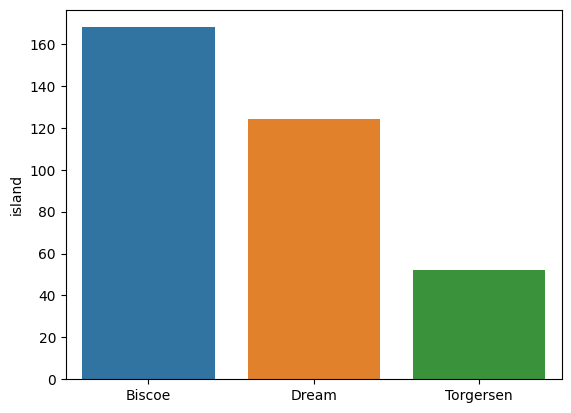

In [9]:
sns.barplot(x=df['island'].value_counts().index,y=df['island'].value_counts())

<Axes: >

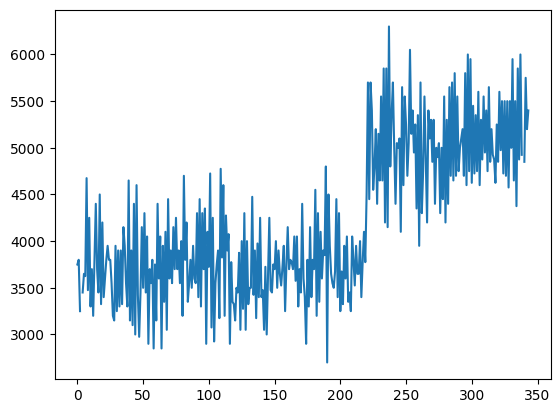

In [10]:
df["body_mass_g"].plot() #plot

In [11]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#BIVARIATE

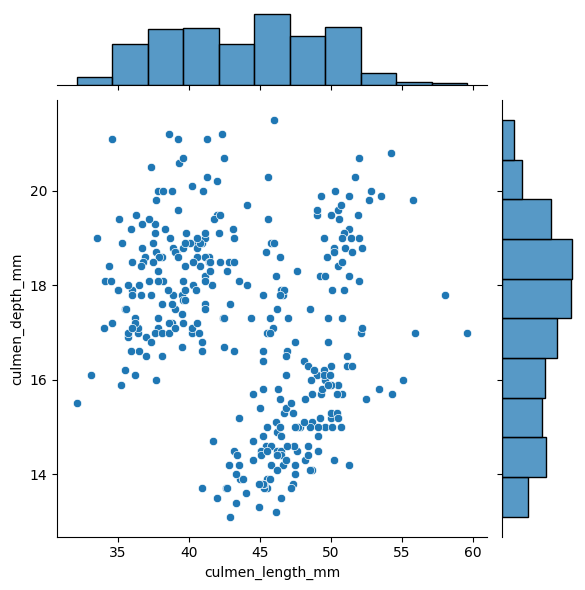

In [12]:
sns.jointplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

<Axes: xlabel='flipper_length_mm', ylabel='culmen_depth_mm'>

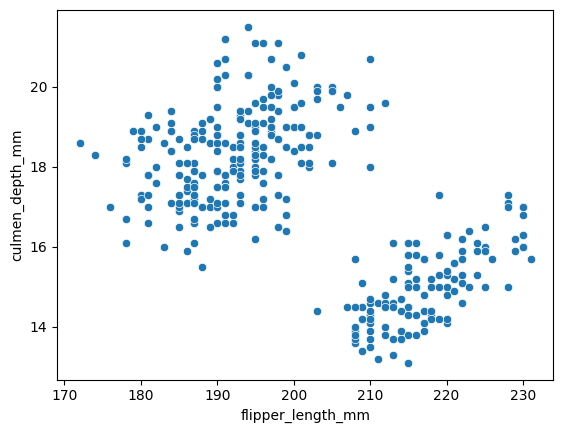

In [13]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['culmen_depth_mm'])

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

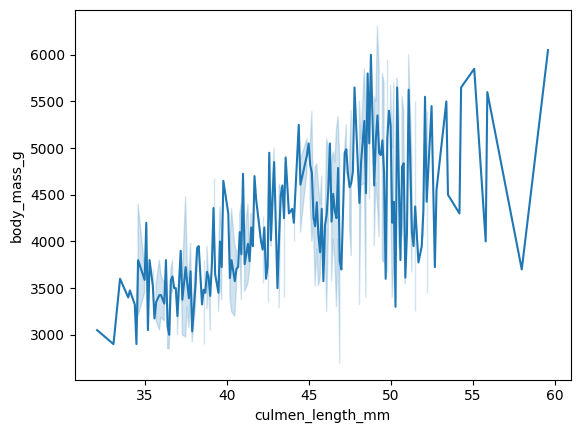

In [15]:
sns.lineplot(x=df['culmen_length_mm'],y=df['body_mass_g'])

#MULTIVARIATE

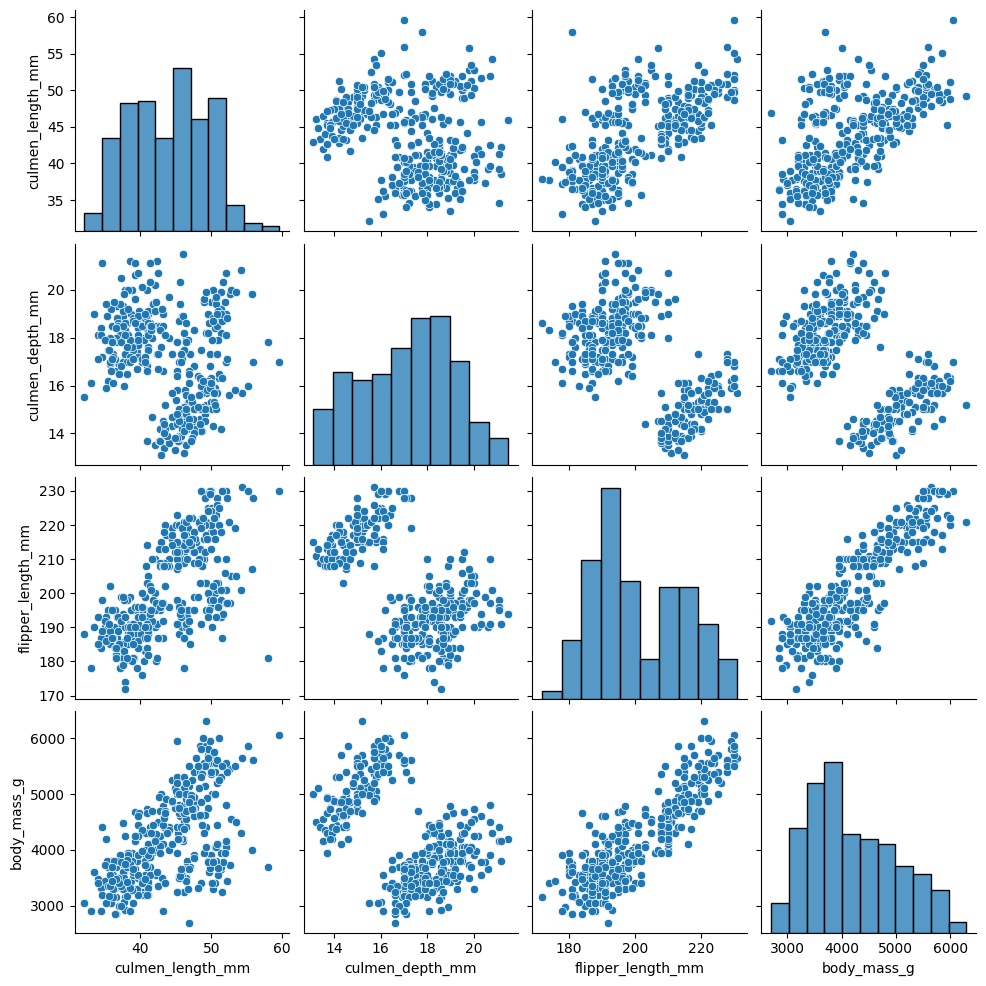

In [16]:
sns.pairplot(df)

<ipython-input-17-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

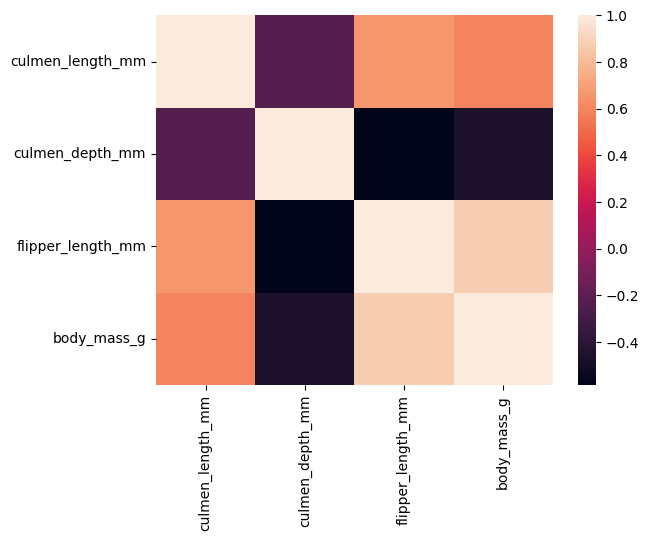

In [17]:
sns.heatmap(df.corr())

In [18]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [20]:
df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.median())

In [21]:
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.median())

In [22]:
df.culmen_depth_mm  = df.culmen_depth_mm .fillna(df.culmen_depth_mm .median())

In [23]:
df.culmen_length_mm   = df.culmen_length_mm  .fillna(df.culmen_length_mm  .median())

In [24]:
df.sex.mode()

0    MALE
Name: sex, dtype: object

In [25]:
df.sex = df.sex.fillna("MALE")

In [26]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

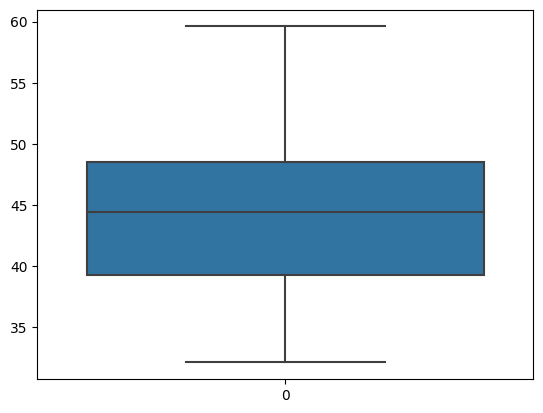

In [27]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

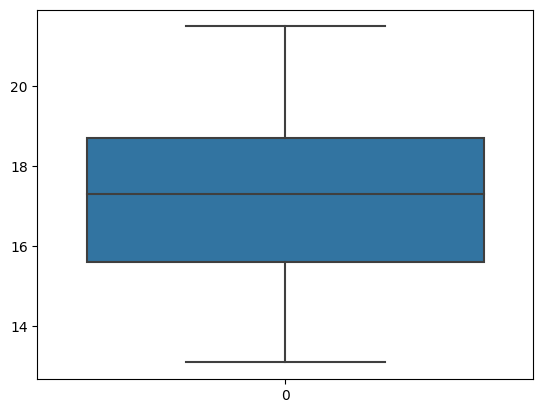

In [28]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

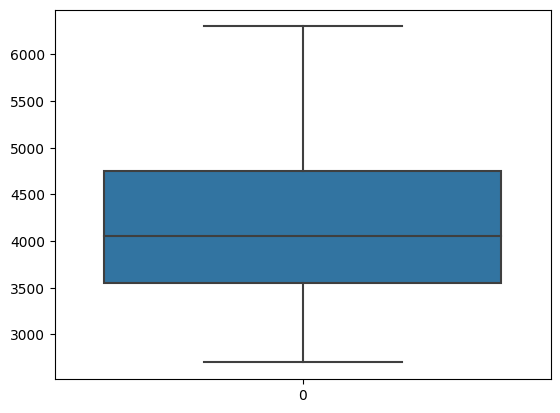

In [29]:
sns.boxplot(df.body_mass_g)

Outliers are not present

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)

In [34]:
df.species = le.fit_transform(df.species)

In [35]:
df.island = le.fit_transform(df.island)

In [36]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

In [37]:
y=df.species


In [38]:
x=df.drop(columns=['species'],axis=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [40]:
X_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0) #y=target data

In [42]:
X_train.shape

(240, 6)

In [43]:
X_test.shape

(104, 6)

In [44]:
y_train.shape

(240,)

In [45]:
y_test.shape

(104,)